In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

#### Cash Request DataFrame

In [51]:
data_1 = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')
df_cash_request = data_1.copy()
df_cash_request.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
2670,6661,100.0,rejected,2020-07-05 11:39:03.162293+00,2020-07-05 17:56:11.332543+00,14799.0,2020-07-05 17:56:11.328578+00,NaN,2020-07-31 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
13378,23698,25.0,money_back,2020-10-23 17:16:44.98779+00,2020-12-18 13:09:46.062164+00,55633.0,NaN,NaN,2020-11-10 23:00:00+00,NaN,2020-11-12 19:36:08.48784+00,instant,2020-10-23 17:17:06.62874+00,NaN,NaN,NaN
19933,21968,100.0,money_back,2020-10-18 15:05:22.058871+00,2020-12-18 13:12:17.731948+00,78383.0,NaN,NaN,2020-11-27 11:00:00+00,2020-10-20,2020-12-01 23:00:00+00,instant,2020-10-18 15:06:03.259247+00,NaN,NaN,NaN
11783,9156,100.0,money_back,2020-07-20 21:02:39.175529+00,2020-12-18 13:09:13.022854+00,18707.0,2020-07-21 14:01:54.683411+00,NaN,2020-08-06 22:00:00+00,2020-07-23,2020-08-06 22:00:00+00,regular,2020-07-27 21:02:39.174976+00,NaN,NaN,NaN
3225,8782,100.0,rejected,2020-07-18 00:04:46.012591+00,2020-07-20 08:59:40.160684+00,20820.0,2020-07-20 08:59:40.15845+00,NaN,2020-08-03 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
13136,4984,100.0,money_back,2020-06-24 14:22:03.999119+00,2020-12-18 13:09:42.056483+00,21292.0,2020-06-24 15:06:10.952003+00,NaN,2020-07-21 10:00:00+00,2020-06-26,2020-07-21 22:00:00+00,regular,NaN,NaN,NaN,NaN
3616,5912,100.0,rejected,2020-06-30 10:35:55.952037+00,2020-06-30 15:48:28.300492+00,NaN,2020-06-30 15:48:28.296301+00,2713.0,2020-08-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
17941,24892,25.0,money_back,2020-10-27 01:48:23.827492+00,2020-12-18 13:11:28.435059+00,95009.0,NaN,NaN,2020-11-06 22:00:00+00,2020-10-28,2020-11-11 23:00:00+00,instant,2020-10-27 01:48:46.398954+00,NaN,NaN,NaN
8824,2673,100.0,money_back,2020-06-07 06:54:09.300618+00,2020-12-18 13:08:36.376082+00,1946.0,2020-06-07 08:02:52.746668+00,NaN,2020-06-29 22:00:00+00,2020-06-09,2020-07-02 18:34:53.037853+00,regular,NaN,NaN,NaN,NaN
15024,14432,100.0,money_back,2020-09-03 21:41:29.947379+00,2020-12-18 13:10:24.441403+00,30537.0,2020-09-04 08:12:09.857354+00,NaN,2020-10-01 22:00:00+00,2020-09-04,2020-10-12 05:19:13.092615+00,instant,2020-09-10 21:41:29.895548+00,completed,2020-10-11 22:52:43.612211+00,2020-10-12 05:19:13.1074+00


#### Fees DataFrame

In [52]:
data_2 = pd.read_csv('../project_dataset/extract - fees - data analyst - .csv')
df_fees = data_2.copy()
df_fees.sample(10)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
7230,20108,17745.0,postpone,accepted,NaN,5.0,Postpone Cash Request 17745,2020-10-30 12:52:53.951035+00,2020-10-30 12:52:57.867906+00,2020-10-30 12:52:57.884069+00,2020-11-03 11:00:00+00,2020-11-12 11:00:00+00,before
5631,20296,18180.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 18180,2020-10-30 16:59:25.434119+00,2020-10-30 16:59:25.434142+00,NaN,2020-11-05 22:00:00+00,2020-12-04 23:00:00+00,before
16953,3609,11499.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 11499,2020-08-12 20:19:25.477713+00,2020-10-13 14:25:16.644468+00,NaN,2020-09-08 22:00:00+00,2020-10-08 22:00:00+00,after
17120,4346,10540.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 10540,2020-08-19 16:22:44.543662+00,2020-10-13 14:25:16.905594+00,NaN,2020-08-27 22:00:00+00,2020-09-24 22:00:00+00,after
4984,15920,23037.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23037,2020-10-22 11:31:17.620895+00,2020-10-22 11:31:17.620924+00,2020-11-06 19:36:27.578315+00,NaN,NaN,after
10119,2868,4353.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-08-05 22:28:09.51106+00,2021-01-20 16:46:16.051995+00,NaN,NaN,NaN,after
9339,2337,6040.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-29 22:18:15.39243+00,2020-10-13 14:25:02.957079+00,2020-08-05 07:43:00.638606+00,NaN,NaN,after
13738,7507,15968.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 15968,2020-09-13 17:26:57.682447+00,2020-10-13 14:25:10.951205+00,2020-10-07 19:58:08.33656+00,NaN,NaN,after
18174,9031,12103.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12103,2020-09-24 06:38:02.075116+00,2020-10-13 14:25:18.401819+00,NaN,2020-10-07 22:00:00+00,2020-11-05 11:00:00+00,after
20213,1558,2852.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-07-17 22:10:52.733462+00,2020-10-13 14:25:02.561575+00,2020-09-23 13:35:52.203712+00,NaN,NaN,after


<h2 style="color: #008080;">Data Cleaning</h2>

#### Crash Request DataFrame

In [53]:
# Get the shape: rows and columns
df_cash_request.shape

(23970, 16)

In [54]:
# Checking for empty spaces
df_cash_request.eq(" ").sum()

id                            0
amount                        0
status                        0
created_at                    0
updated_at                    0
user_id                       0
moderated_at                  0
deleted_account_id            0
reimbursement_date            0
cash_request_received_date    0
money_back_date               0
transfer_type                 0
send_at                       0
recovery_status               0
reco_creation                 0
reco_last_update              0
dtype: int64

In [55]:
# chechking for duplicates
print(df_cash_request.duplicated().sum())

0


In [56]:
# Checking for NaNs
df_cash_request.isna().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [57]:
# We want to analyze the following columns 
# user_id, deleted_account_id, recovery_status, reco_creation and reco_last_update

# We create a new Dataframe only with the recovery incident details
# --> reduce null values from recovery_status, reco_creation, reco_last_update in the df_cash_request DataFrames
df_recovery_incidents = df_cash_request[df_cash_request["recovery_status"].notnull()]

# We create in df_cash_request the recovery_status column to detail wether there are incidents or not
# We have created it from reco_creation but any of these three columns could be used for that
df_cash_request["recovery_incident"] = ~df_cash_request["reco_creation"].isna()


# Drop the columns: recovery_status, reco_creation, reco_last_update from df_cash_request
# They contain to many NaN values and we want them out to clean our DataFrame
df_cash_request.drop(columns= ["recovery_status","reco_creation","reco_last_update"], inplace=True) 
df_cash_request

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,False
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,False
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,False
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,False
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,True
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,False
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,False


In [58]:
# Now we have two DataFrames: 
# df_cash_request with the new column recovery_incident wich tell us if there was any recovery incident (True), or not (False)
# and another DataFrame df_recovery_incidents with the information of these recovery incidents 

In [59]:
# Now we want to analyce user_id and deleted_account_id
df_cash_request[["id", "user_id", "deleted_account_id"]]

,id,user_id,deleted_account_id
0,5,804.0,NaN
1,70,231.0,NaN
2,7,191.0,NaN
3,10,761.0,NaN
4,1594,7686.0,NaN
...,...,...,...
23965,20616,13681.0,NaN
23966,25243,NaN,30367.0
23967,22357,82122.0,NaN
23968,20256,64517.0,NaN


In [60]:
# Merge "user_id" and "deleted_account_id" to have no NaN values
df_cash_request["user_id_merged"] = df_cash_request["user_id"].fillna(df_cash_request["deleted_account_id"])
df_cash_request.drop(columns= ["user_id", "deleted_account_id"], inplace=True) 
df_cash_request.sample(10)

,id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged
11451,6821,100.0,money_back,2020-07-06 21:54:35.536513+00,2020-12-18 13:09:06.447653+00,2020-07-07 09:56:52.074723+00,2020-07-29 22:00:00+00,2020-07-08,2020-07-29 22:00:00+00,regular,NaN,False,19461.0
19335,21111,10.0,money_back,2020-10-14 15:50:46.902188+00,2020-12-18 13:12:02.90928+00,2020-10-14 15:51:22.315282+00,2020-10-29 16:50:44.536+00,2020-10-14,2020-10-20 15:11:03.040886+00,instant,2020-10-14 15:52:28.123865+00,False,12934.0
14485,12509,50.0,money_back,2020-08-14 14:16:47.707314+00,2020-12-18 13:10:12.212376+00,2020-08-14 16:05:08.723295+00,2020-09-07 22:00:00+00,2020-08-18,2020-09-08 19:23:14.621606+00,instant,2020-08-21 14:16:47.654941+00,False,30959.0
9756,1728,100.0,money_back,2020-05-13 13:21:35.376522+00,2020-06-11 00:28:47.300295+00,2020-05-13 13:46:42.349433+00,2020-06-03 22:00:00+00,2020-05-14,2020-06-11 00:28:47.299982+00,regular,NaN,False,21776.0
2851,7053,100.0,rejected,2020-07-08 05:21:15.817649+00,2020-07-08 13:22:55.314979+00,2020-07-08 13:22:55.31271+00,2020-08-05 22:00:00+00,NaN,NaN,regular,NaN,False,2981.0
7423,17697,100.0,rejected,2020-09-24 18:02:58.143996+00,2020-09-25 07:32:41.977842+00,2020-09-25 07:32:41.969857+00,2020-10-11 18:02:58.112211+00,NaN,NaN,instant,2020-10-01 18:02:58.112211+00,False,40818.0
18418,19891,100.0,money_back,2020-10-08 14:32:18.147543+00,2020-12-18 13:11:41.866853+00,NaN,2020-11-04 22:00:00+00,2020-10-09,2020-11-04 19:44:37.23964+00,instant,2020-10-08 14:32:45.758652+00,False,18515.0
21151,20770,50.0,money_back,2020-10-13 07:57:46.704995+00,2020-12-18 13:12:48.553251+00,NaN,2020-10-28 08:57:42.275+00,2020-10-21,2020-10-28 07:04:39.706726+00,regular,2020-10-20 07:57:46.702693+00,False,69956.0
15747,15060,50.0,money_back,2020-09-08 05:21:41.186006+00,2020-12-18 13:10:38.767137+00,2020-09-08 08:53:33.503795+00,2020-10-05 22:00:00+00,2020-09-11,2020-10-06 19:34:54.887665+00,instant,2020-09-15 05:21:41.13582+00,False,16698.0
23242,23290,50.0,money_back,2020-10-23 07:11:03.705972+00,2020-12-18 13:14:33.162411+00,NaN,2020-11-03 23:51:00+00,2020-10-24,2020-12-02 13:33:50.242052+00,instant,2020-10-23 07:11:19.10385+00,True,85501.0


In [61]:
# We keep everything else with NaN
df_cash_request.isna().sum()

id                               0
amount                           0
status                           0
created_at                       0
updated_at                       0
moderated_at                  7935
reimbursement_date               0
cash_request_received_date    7681
money_back_date               7427
transfer_type                    0
send_at                       7329
recovery_incident                0
user_id_merged                   0
dtype: int64

### Fees DataFrame

In [62]:
df_fees.shape

(21061, 13)

In [63]:
# chechking for duplicates
print(df_fees.duplicated().sum())

0


In [64]:
# Checking for empty spaces
df_fees.eq(" ").sum()

id                 0
cash_request_id    0
type               0
status             0
category           0
total_amount       0
reason             0
created_at         0
updated_at         0
paid_at            0
from_date          0
to_date            0
charge_moment      0
dtype: int64

In [65]:
# Checking for NaNs
df_fees.isna().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [66]:
# Save information about cases with pospone fees 
# to a new data frame `df_postpone_fees`
df_postpone_fees = df_fees[df_fees["from_date"].notnull()]
df_postpone_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
11,15434,21897.0,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00,2020-10-21 09:00:21.619504+00,2020-10-21 09:00:25.398771+00,2020-10-26 22:00:00+00,2020-10-30 23:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
17,13949,19876.0,postpone,accepted,NaN,5.0,Postpone Cash Request 19876,2020-10-16 08:34:39.39839+00,2020-10-16 08:34:39.398412+00,2020-10-16 08:34:43.529531+00,2020-10-23 13:25:59.902+00,2020-11-03 23:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,411,3891.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3891,2020-06-22 08:24:47.439636+00,2021-01-20 14:46:09.980392+00,NaN,2020-07-03 22:00:00+00,2020-07-18 22:00:00+00,before
20597,1022,2717.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2717,2020-07-04 10:05:48.68153+00,2021-01-20 16:59:23.745182+00,2020-07-04 10:05:52+00,2020-07-07 22:00:00+00,2020-08-04 22:00:00+00,before
20605,681,3716.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3716,2020-06-26 15:13:10.276716+00,2021-01-21 15:47:52.053382+00,2020-06-26 15:13:45+00,2020-07-20 22:00:00+00,2020-08-04 22:00:00+00,before
20607,4561,10801.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10801,2020-08-21 11:28:54.470364+00,2021-01-21 16:54:46.995586+00,2020-08-21 11:29:00+00,2020-09-08 10:00:00+00,2020-10-07 10:00:00+00,before


In [67]:
# drop columns "from_date","to_date" because of lots of NaN
# keep the information True/False for postpone fees in postpone_fees
df_fees["postpone_fees"] = df_fees["from_date"].notna()
df_fees.drop(columns= ["from_date","to_date"], inplace=True) 
df_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False


In [68]:
# category column describes the reason of the incident fee.
# save this information separately, keep a flag that there was an incident
df_fees_incident = df_fees[df_fees["category"].notnull()]
df_fees_incident

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False
7,14187,14839.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00,2020-10-16 23:48:50.655988+00,2020-11-05 14:15:36.600041+00,after,False
15,14420,17963.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00,2020-10-17 22:18:53.924429+00,2020-10-17 22:19:00.10911+00,after,False
27,14433,10287.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00,2020-10-17 22:19:48.806303+00,2020-12-17 14:33:35.516056+00,after,False
40,14188,15989.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.16855+00,2020-10-16 23:48:52.168578+00,2020-11-16 13:33:09.113667+00,after,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21044,3491,8952.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00,2020-10-13 14:25:02.938088+00,2020-10-08 07:24:45.091469+00,after,False
21045,7166,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00,2020-10-13 14:25:02.546591+00,2020-10-08 07:24:44.561304+00,after,False
21046,12566,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00,2020-10-13 14:25:18.627143+00,NaN,after,False
21047,13537,14289.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00,2020-10-14 22:35:49.950347+00,NaN,after,False


In [69]:
# new colum is_incident created and replace tha category column
df_fees["is_incident"] = df_fees["category"].notna()
df_fees.drop(columns= ["category"], inplace=True) 
df_fees

,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident
0,6537,14941.0,instant_payment,rejected,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False,False
1,6961,11714.0,incident,accepted,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False,True
2,16296,23371.0,instant_payment,accepted,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False,False
3,20775,26772.0,instant_payment,accepted,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False,False
4,11242,19350.0,instant_payment,accepted,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False,False
21057,20768,26764.0,instant_payment,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False,False
21058,18779,25331.0,instant_payment,rejected,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False,False
21059,16542,23628.0,instant_payment,rejected,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False,False


<h2 style="color: #008080;">Identifying Cohorts</h2>

In [70]:
# We want to divide cohorts by the created_at column
# first we want to check the data type of the dates
df_cash_request.dtypes

id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
moderated_at                   object
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_incident                bool
user_id_merged                float64
dtype: object

In [71]:
# convert all values to datetime format in one column
df_cash_request["created_at"] = pd.to_datetime(df_cash_request["created_at"])

In [72]:
# new column with yy_mm from created_at
df_cash_request["month_created"] = df_cash_request["created_at"].dt.strftime('%Y-%m')

In [73]:
# See the period of type where the data cames from
print(df_cash_request["month_created"].nunique())
print(df_cash_request["month_created"].max())
print(df_cash_request["month_created"].min())
print(df_cash_request["month_created"].mode())

13
2020-11
2019-11
0    2020-10
Name: month_created, dtype: object


In [74]:
# rename id column to cash_request_id
df_cash_request.rename(columns={"id": "cash_request_id"}, inplace=True)
df_cash_request.head(1)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12


In [75]:
# see amount of user for each month
df_cash_request[["cash_request_id", "month_created"]].groupby("month_created").count()

,cash_request_id
month_created,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


In [76]:
# drop the fist month records because there was only one cash request in the opening month
df_cash_request[df_cash_request["month_created"] == '2019-11']

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,2019-11-20 12:16:50+00,2019-12-05 23:00:00+00,NaN,NaN,regular,NaN,False,47.0,2019-11


In [77]:
# create a new dataframe with the date created sorted
df_cash_request_hist = df_cash_request.sort_values("created_at")
df_cash_request_hist.head(5)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,2019-11-20 12:16:50+00,2019-12-05 23:00:00+00,NaN,NaN,regular,NaN,False,47.0,2019-11
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00,2019-12-09 14:58:28+00,2019-12-16 23:00:00+00,NaN,NaN,regular,NaN,False,1309.0,2019-12
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00,2019-12-11 09:40:33+00,2020-02-05 23:00:00+00,2019-12-11,NaN,regular,NaN,True,812.0,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,2019-12-11 09:46:59.777728+00,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,False,191.0,2019-12


Cash requests by month


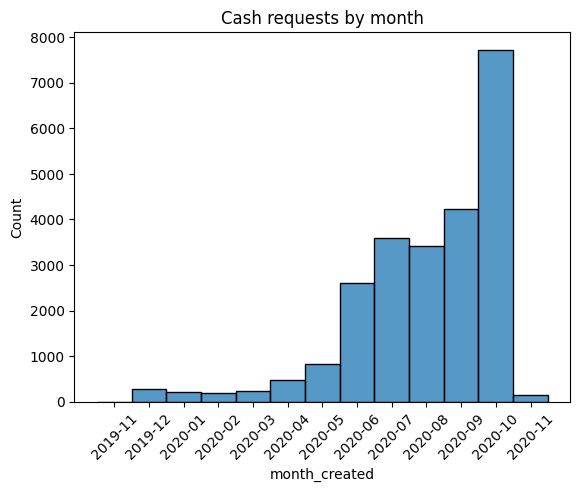

In [78]:
print("Cash requests by month")

plt.figure()
sns.histplot(x="month_created", data=df_cash_request_hist, discrete=True)
plt.title(f'Cash requests by month')
plt.xticks(rotation=45)
plt.show()

# We can use this histogram to show how we devided the cohorts

In [79]:
# We observe high kurtosis and negative Skewing

In [80]:
# Creating the cohorts
min_date = df_cash_request["month_created"].min()
max_date = df_cash_request["month_created"].max()

bins = [min_date , '2020-05', max_date]
labels = ['Cohort-1', 'Cohort-2']
df_cash_request["cohort"] = pd.cut(df_cash_request["month_created"], bins =bins,labels=labels, include_lowest = True)

df_cash_request.head(2)

,cash_request_id,amount,status,created_at,updated_at,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_incident,user_id_merged,month_created,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,2019-12-11 16:47:42.405646+00,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,False,804.0,2019-12,Cohort-1
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,2019-12-11 14:24:22.897988+00,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,False,231.0,2019-12,Cohort-1


<h2 style="color: #008080;">Metrics to Analyze</h2>

### Frequency of Service Usage

In [81]:
# Absolute frequency
frequency_table = df_cash_request["cohort"].value_counts()

In [82]:
# Relative frequency
proportion_table = df_cash_request["cohort"].value_counts(normalize=True)

In [83]:
# concat these two dataframes
df_freq = pd.concat([frequency_table, proportion_table], axis=1)
df_freq.columns= ["absolute_frequency", "relative_frequency"]
round(df_freq,2)

,absolute_frequency,relative_frequency
cohort,,
Cohort-2,21719,0.91
Cohort-1,2251,0.09


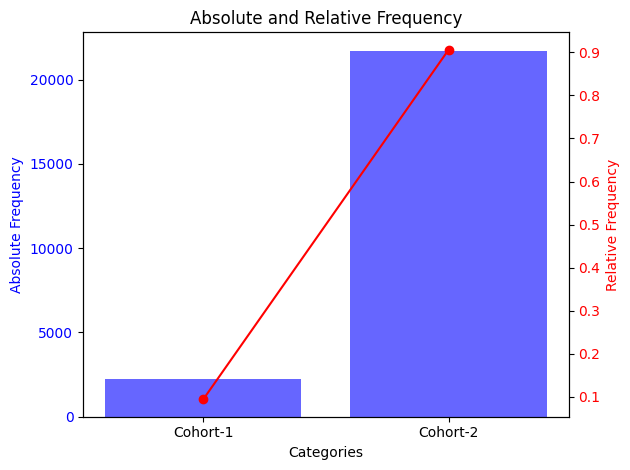

In [84]:
# Define the desired order of cohorts
desired_order = ['Cohort-1', 'Cohort-2']  # Adjust based on your actual cohort names

# Reorder the DataFrame according to the desired order
df_freq = df_freq.loc[desired_order]

# Now, re-run the plotting code
fig, ax1 = plt.subplots()

# Plot the absolute frequency on the left y-axis
ax1.bar(df_freq.index, df_freq['absolute_frequency'], color='b', alpha=0.6, label='Absolute Frequency')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Absolute Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the relative frequency
ax2 = ax1.twinx()
ax2.plot(df_freq.index, df_freq['relative_frequency'], color='r', label='Relative Frequency', marker='o')
ax2.set_ylabel('Relative Frequency', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and show the plot
plt.title('Absolute and Relative Frequency')
fig.tight_layout()

# Display the plot
plt.show()

### Revenue Generated by the Cohort

In [85]:
print("NaNs id in df_fees",df_fees["id"].isnull().sum())
print("NaNs cash_request_id in df_fees",df_fees["cash_request_id"].isnull().sum())
print("NaNs cash_request id in df_cash_request", df_cash_request["cash_request_id"].isnull().sum())

merged_df_fees = df_fees.copy()

# create column "cohort" in df_fees and map cohort values from df_cash_request to df_fees based on the cash_request_id column
merged_df_fees["cohort"] = merged_df_fees["cash_request_id"].map(df_cash_request.set_index("cash_request_id")["cohort"])

print("NaNs cohort in df_fees",merged_df_fees["cohort"].isnull().sum())

merged_df_fees

NaNs id in df_fees 0
NaNs cash_request_id in df_fees 4
NaNs cash_request id in df_cash_request 0
NaNs cohort in df_fees 4


,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident,cohort
0,6537,14941.0,instant_payment,rejected,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False,False,Cohort-2
1,6961,11714.0,incident,accepted,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False,True,Cohort-2
2,16296,23371.0,instant_payment,accepted,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False,False,Cohort-2
3,20775,26772.0,instant_payment,accepted,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False,False,Cohort-2
4,11242,19350.0,instant_payment,accepted,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False,False,Cohort-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False,False,Cohort-2
21057,20768,26764.0,instant_payment,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False,False,Cohort-2
21058,18779,25331.0,instant_payment,rejected,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False,False,Cohort-2
21059,16542,23628.0,instant_payment,rejected,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False,False,Cohort-2


In [86]:
# find rows with NaNs
nan_rows = merged_df_fees[merged_df_fees["cohort"].isna()]
nan_rows


,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident,cohort
1911,2990,NaN,instant_payment,cancelled,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,after,False,False,NaN
1960,3124,NaN,instant_payment,cancelled,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,after,False,False,NaN
4605,5185,NaN,instant_payment,cancelled,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,after,False,False,NaN
11870,3590,NaN,instant_payment,cancelled,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,after,False,False,NaN


In [87]:
# Sum total amount for "cohorts-1"
cohort1_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-1"]["total_amount"].sum()

# Sum total amount for "cohorts-2"
cohort2_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-2"]["total_amount"].sum()

print(f"Total Amount for Cohort-1: {cohort1_total}")
print(f"Total Amount for Cohort-2: {cohort2_total}")


Total Amount for Cohort-1: 1290.0
Total Amount for Cohort-2: 104000.0


<BarContainer object of 2 artists>

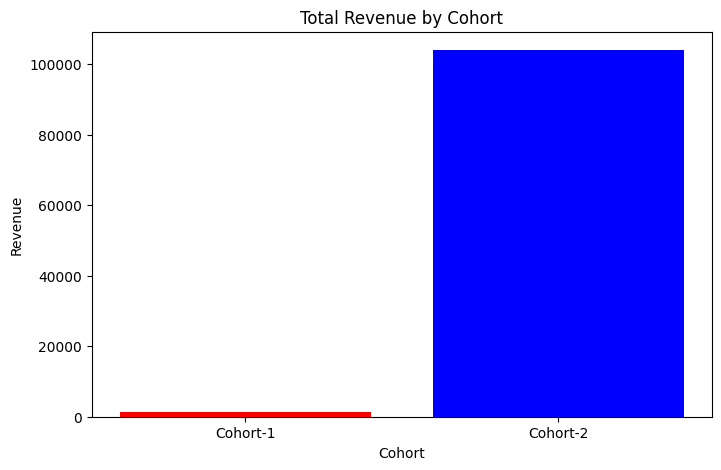

In [88]:


data = { "cohort": ["Cohort-1", "Cohort-2"], "Total_amount": [cohort1_total, cohort2_total]}

df = pd.DataFrame(data)

df
plt.figure(figsize=(8,5))
plt.xlabel("Cohort")
plt.ylabel("Revenue")
plt.title('Total Revenue by Cohort')
plt.bar(df.cohort, df["Total_amount"], color= ["Red","Blue"], edgecolor=None, width=0.8, align='center', alpha=None, label=None)



### Incident Rate

In [89]:

# create a new dataframe called merged_df_fees with the column cohort in it
merged_df_fees = df_fees.merge(df_cash_request[['cash_request_id', 'cohort']], on='cash_request_id', how='left')

incident_rate = pd.crosstab(merged_df_fees['cohort'], merged_df_fees['type'])


incident_rate


type,incident,instant_payment,postpone
cohort,,,
Cohort-1,44,0,214
Cohort-2,2152,11095,7552


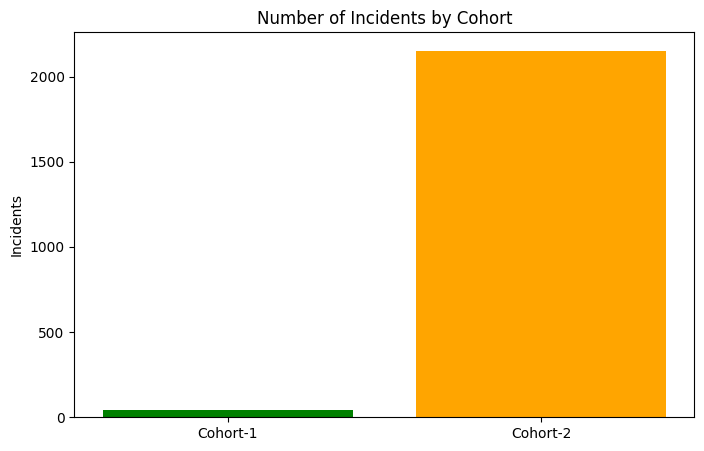

In [90]:


plt.figure(figsize=(8,5))
plt.xlabel("")
plt.ylabel("Incidents")
plt.title('Number of Incidents by Cohort')
plt.bar(incident_rate.index, incident_rate["incident"], color= ["Green","Orange"], edgecolor=None, width=0.8, align='center', alpha=None, label=None)



df = pd.DataFrame(data)

### Revenue Generated by the Cohort

In [91]:

print("NaNs id in df_fees",df_fees["id"].isnull().sum())
print("NaNs cash_request_id in df_fees",df_fees["cash_request_id"].isnull().sum())
print("NaNs cash_request id in df_cash_request", df_cash_request["cash_request_id"].isnull().sum())



print("NaNs cohort in df_fees",merged_df_fees.isnull().sum())

df_fees

NaNs id in df_fees 0
NaNs cash_request_id in df_fees 4
NaNs cash_request id in df_cash_request 0
NaNs cohort in df_fees id                    0
cash_request_id       4
type                  0
status                0
total_amount          0
reason                0
created_at            0
updated_at            0
paid_at            5530
charge_moment         0
postpone_fees         0
is_incident           0
cohort                4
dtype: int64


,id,cash_request_id,type,status,total_amount,reason,created_at,updated_at,paid_at,charge_moment,postpone_fees,is_incident
0,6537,14941.0,instant_payment,rejected,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,after,False,False
1,6961,11714.0,incident,accepted,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,after,False,True
2,16296,23371.0,instant_payment,accepted,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,after,False,False
3,20775,26772.0,instant_payment,accepted,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,after,False,False
4,11242,19350.0,instant_payment,accepted,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,after,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,after,False,False
21057,20768,26764.0,instant_payment,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,after,False,False
21058,18779,25331.0,instant_payment,rejected,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,after,False,False
21059,16542,23628.0,instant_payment,rejected,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,after,False,False


In [92]:
# find rows with NaNs
nan_rows = merged_df_fees["cohort"].isna().sum()
nan_rows

4

In [93]:
# Sum total amount for "cohorts-1"
cohort1_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-1"]["total_amount"].sum()

# Sum total amount for "cohorts-2"
cohort2_total = merged_df_fees[merged_df_fees["cohort"] == "Cohort-2"]["total_amount"].sum()

print(f"Total Amount for Cohorts-1: {cohort1_total}")
print(f"Total Amount for Cohorts-2: {cohort2_total}")

Total Amount for Cohorts-1: 1290.0
Total Amount for Cohorts-2: 104000.0


### New Relevant metric: Fee types usage

In [94]:
# create a crosstab with the types of fee incident per cohort proportionalized
result = pd.crosstab(merged_df_fees['cohort'], merged_df_fees['type'])
proportions_fees = (result.div(result.sum(axis=1), axis=0)).round(2)
proportions_fees

type,incident,instant_payment,postpone
cohort,,,
Cohort-1,0.17,0.00,0.83
Cohort-2,0.10,0.53,0.36


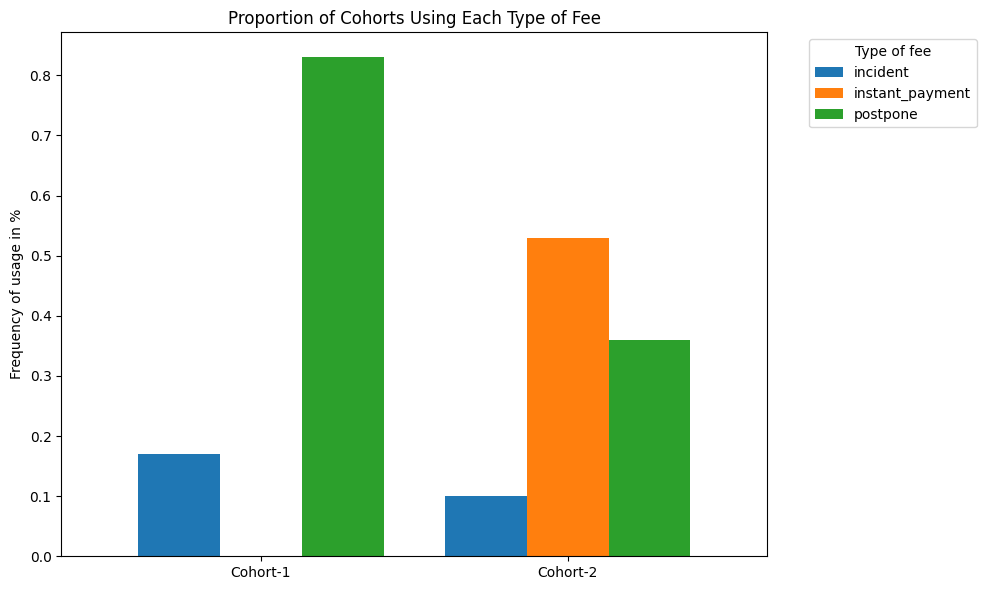

In [95]:
# Create a grouped bar plot
proportions_fees.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the plot
plt.title('Proportion of Cohorts Using Each Type of Fee')
plt.ylabel('Frequency of usage in %')
plt.xlabel('')
plt.xticks(rotation=0)  # Keeps the cohort labels horizontal
plt.legend(title='Type of fee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [96]:
# Chi-square test for cohorts and type of fees
# Since p-value is very low we could say that the two variables have a significant association between them
# We reject the null hypothesis
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(result)
chi2_pvalue

1.2401462613213038e-65

In [97]:
# Computing the association between variables in 'result' using the "cramer" method
# However, given that the Cramer is too low we can say that there is no stron association between the two variables
association(result, method='cramer')

0.11914306814147266

In [98]:
## Save Dataframe to a CSV
df_cash_request_hist.to_csv('usersUsage.csv', index=False)
df_freq.to_csv('freqCohorts.csv', index=False)

# Incident Rate
# Revenue Generated by the Cohort
proportions_fees.to_csv('proportionFees.csv', index=False)
